<a href="https://colab.research.google.com/github/Rushikhot/Customer-churn-rate-prediction/blob/main/Breast_cancer_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/data (1).csv')

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [6]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

/tmp/ipython-input-813461900.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['radius_mean'])


<Axes: xlabel='radius_mean', ylabel='Density'>

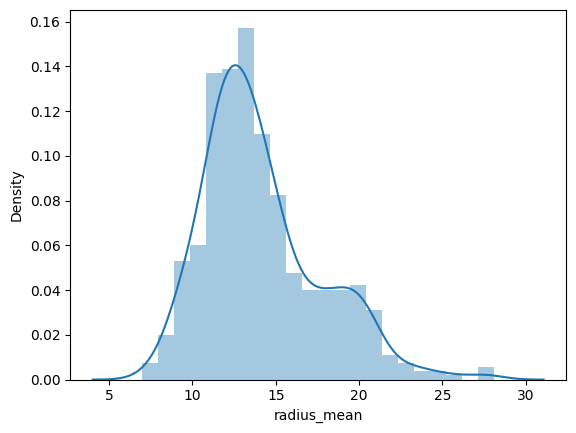

In [9]:
sns.distplot(df['radius_mean'])

In [10]:
!pip install ydata-profiling

In [14]:
from ydata_profiling import ProfileReport

In [15]:
profile= ProfileReport(df,title='Pandas Profiling Report',explorative=True)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:00<00:00, 70.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(569, 31)

In [22]:
df = pd.get_dummies(df,columns=['diagnosis'],drop_first=True,dtype=int)

In [23]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [102]:
x_train= df.drop(columns=['diagnosis_M'])
y_train= df['diagnosis_M']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
x_train_tf = sc.fit_transform(x_train)
x_test_tf = sc.transform(x_test)

In [31]:
x_test_tf

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [32]:
x_train_tf

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

In [62]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [63]:
y_pred = rf.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 3, 40]])

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn= KNeighborsClassifier(n_neighbors=10)

In [94]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [95]:
knn.predict(x_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [98]:
 ac= accuracy_score(y_test, y_pred_knn)

In [89]:
confusion_matrix(y_test,y_pred_knn)

array([[68,  3],
       [ 5, 38]])

In [106]:
scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    scores.append(accuracy_score(y_test, y_pred))

In [107]:
scores

[1.0,
 0.945054945054945,
 0.9560439560439561,
 0.945054945054945,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.945054945054945,
 0.945054945054945,
 0.945054945054945,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9340659340659341,
 0.9340659340659341,
 0.945054945054945,
 0.9340659340659341,
 0.9340659340659341,
 0.9230769230769231,
 0.9340659340659341]

In [109]:
scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    scores.append(accuracy_score(y_test, y_pred))

In [110]:
scores

[1.0,
 0.945054945054945,
 0.9560439560439561,
 0.945054945054945,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.945054945054945,
 0.945054945054945,
 0.945054945054945,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9560439560439561,
 0.9340659340659341,
 0.9340659340659341,
 0.945054945054945,
 0.9340659340659341,
 0.9340659340659341,
 0.9230769230769231,
 0.9340659340659341]

In [117]:
scoress = []

for i in range(1,25):

    rf= RandomForestClassifier(n_estimators=500, max_depth=i, random_state=42)

    rf.fit(x_train,y_train)

    y_pred = rf.predict(x_test)

    scoress.append(accuracy_score(y_test, y_pred))

In [118]:
scoress

[0.945054945054945,
 0.9560439560439561,
 0.978021978021978,
 0.978021978021978,
 0.978021978021978,
 0.989010989010989,
 0.989010989010989,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Accuracy score for KNN: 0.9298245614035088
